# Analysis of the Freewar statistics

## Imports and Setup

In [1]:
from pathlib import Path
from datetime import datetime
import pandas as pd
from matplotlib import ticker
from matplotlib import dates as mdates
from matplotlib import pyplot as plt

csv_path = Path.cwd() / 'FreewarStatistics.csv'

## Read the Data

In [2]:
csv_date_parser = lambda  d: datetime.strptime(d, '%d.%m.%y %H:%M')
df = pd.read_csv(csv_path, parse_dates=['date'], date_parser=csv_date_parser)
(df.head(5))

,date,bank,stock,items_inventory,items_bank,total,xp,stock_pl
0,2016-04-19,210427,294108,189341,23865,724394,12294,0
1,2016-04-20,210771,279525,189922,26819,710992,12448,0
2,2016-04-21,211104,313813,188799,26699,749623,12482,0
3,2016-04-22,170437,287651,189167,27082,675284,12604,0
4,2016-04-23,170764,283226,190050,27632,675973,12654,0


## Plot XP

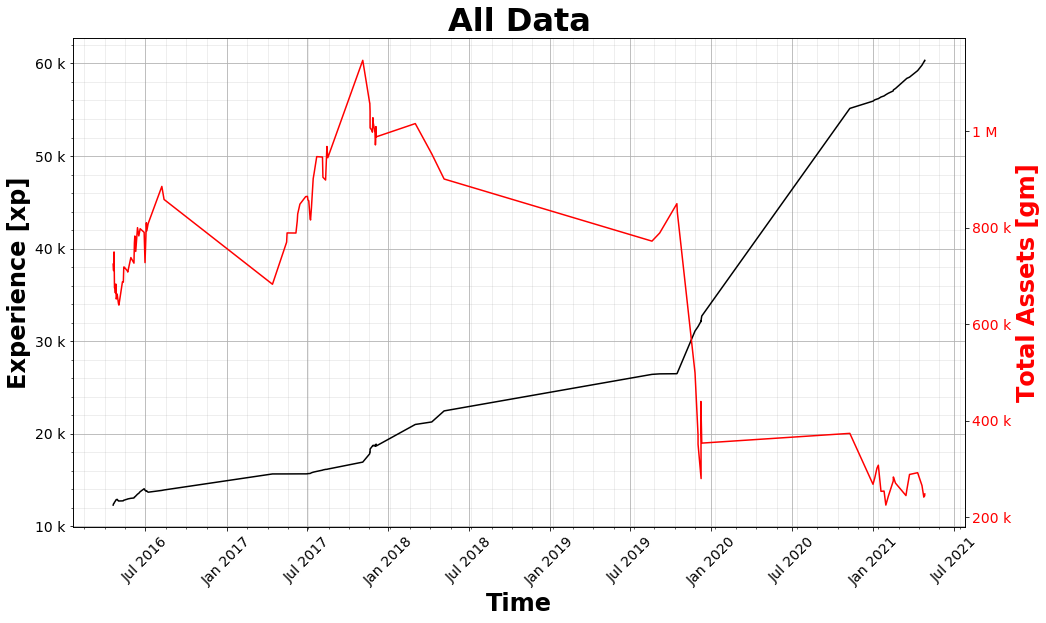

In [3]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot_date(df['date'], df['xp'],'k-')

# grid
ax.grid()
ax.minorticks_on()
ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# text
ax.set_title('All Data',fontsize=32,fontweight='bold')
ax.set_xlabel('Time',fontsize=24,fontweight='bold')
ax.set_ylabel('Experience [xp]',fontsize=24,fontweight='bold')

# Add second y-axis
ax2 = ax.twinx()
ax2.plot_date(df['date'], df['total'],'r-')
ax2.set_ylabel('Total Assets [gm]',color='red',fontsize=24,fontweight='bold')
ax2.tick_params(axis='y',labelcolor='red')

# format x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_tick_params(labelsize=14)

# format y-axis
y_formatter = ticker.EngFormatter('')
ax.yaxis.set_major_formatter(y_formatter)
ax2.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_tick_params(labelsize=14)
ax2.yaxis.set_tick_params(labelsize=14)


## Save the Figure

In [4]:
fig.savefig('FreewarStatistics.pdf',bbox_inches='tight')
fig.savefig('FreewarStatistics.png', dpi=600, bbox_inches='tight')
print('Figure saved! ' + datetime.now().strftime('%d.%m.%Y %H:%M'))



Figure saved! 27.04.2021 00:14


## Plot 2021

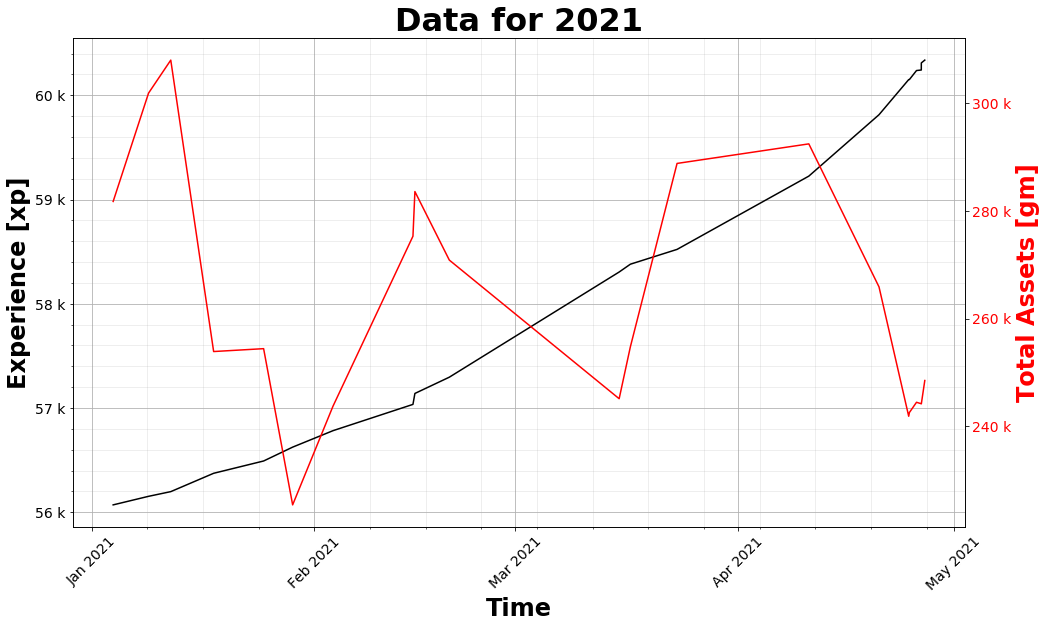

In [5]:
filtered = df[df['date'].dt.strftime('%Y') == '2021']

fig, ax = plt.subplots(figsize=(16,9))
ax.plot_date(filtered['date'],filtered['xp'],'k-')

# grid
ax.grid()
ax.minorticks_on()
ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# text
ax.set_title('Data for 2021',fontsize=32,fontweight='bold')
ax.set_xlabel('Time',fontsize=24,fontweight='bold')
ax.set_ylabel('Experience [xp]',fontsize=24,fontweight='bold')

# Add second y-axis
ax2 = ax.twinx()
ax2.plot_date(filtered['date'],filtered['total'],'r-')
ax2.set_ylabel('Total Assets [gm]',color='red',fontsize=24,fontweight='bold')
ax2.tick_params(axis='y',labelcolor='red')

# format x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_tick_params(labelsize=14)

# format y-axis
y_formatter = ticker.EngFormatter('')
ax.yaxis.set_major_formatter(y_formatter)
ax2.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_tick_params(labelsize=14)
ax2.yaxis.set_tick_params(labelsize=14)

## Save the Figure

In [6]:
fig.savefig('FreewarStatistics_2021.pdf',bbox_inches='tight')
fig.savefig('FreewarStatistics_2021.png', dpi=600, bbox_inches='tight')
print('Figure saved! ' + datetime.now().strftime('%d.%m.%Y %H:%M'))

Figure saved! 27.04.2021 00:14
